In [10]:
from model import NeuralNetwork
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# useiden eri mnist datasettien jälkeen päädyin tähän pikkelöityyn
# https://www.kaggle.com/datasets/pablotab/mnistpklgz
from utilities import vectorize_label


with gzip.open('../data/mnist.pkl.gz', 'rb') as f:
    train_set, val_set, test_set = pickle.load(f, encoding='latin1')

X_train = [np.reshape(x, (784, 1)) for x in train_set[0]]
y_train = [vectorize_label(y) for y in train_set[1]]
X_val = [np.reshape(x, (784, 1)) for x in val_set[0]]
Y_val = val_set[1]
X_test = [np.reshape(x, (784, 1)) for x in test_set[0]]
y_test = test_set[1]



In [18]:
model = NeuralNetwork([784, 100, 10])
model.fit(X_train, y_train, 30, 3.0, 100)

epoch 0 done
epoch 1 done
epoch 2 done
epoch 3 done
epoch 4 done
epoch 5 done
epoch 6 done
epoch 7 done
epoch 8 done
epoch 9 done
epoch 10 done
epoch 11 done
epoch 12 done
epoch 13 done
epoch 14 done
epoch 15 done
epoch 16 done
epoch 17 done
epoch 18 done
epoch 19 done
epoch 20 done
epoch 21 done
epoch 22 done
epoch 23 done
epoch 24 done
epoch 25 done
epoch 26 done
epoch 27 done
epoch 28 done
epoch 29 done


7
2
1
0
4
1
4
9
5
9


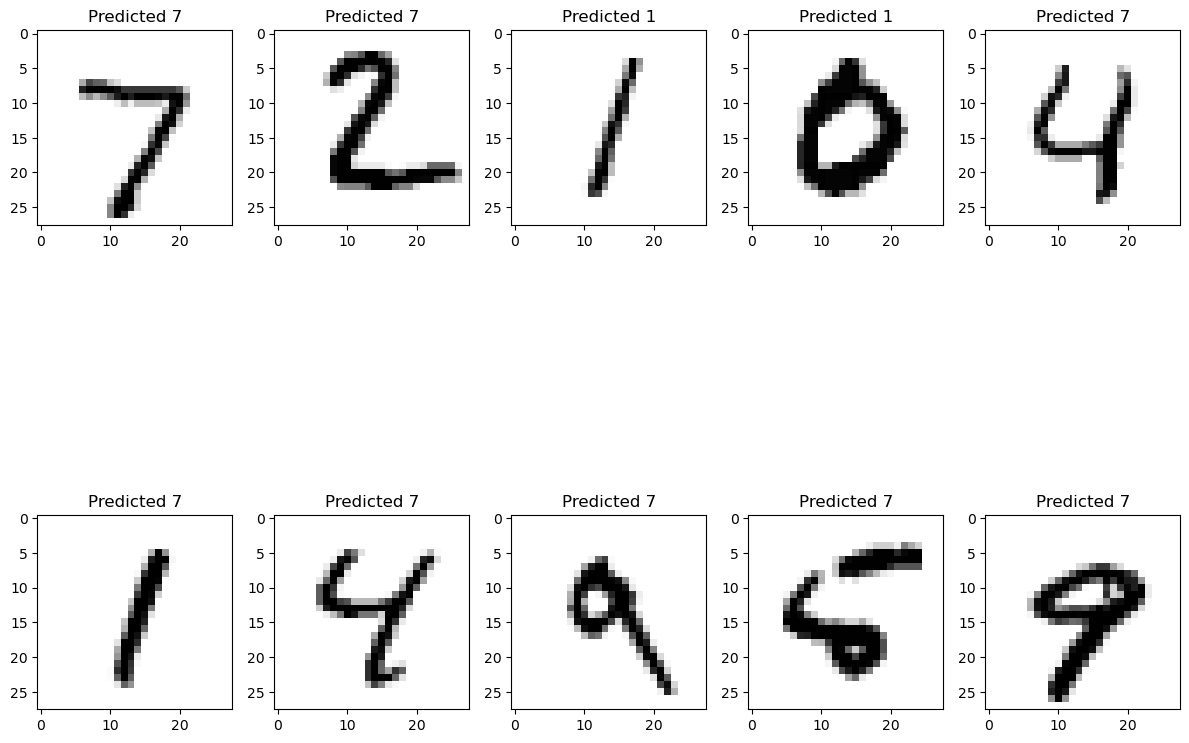

In [20]:
n_prediction = 10

fig, axes = plt.subplots(2, 5, figsize=(12, 12))

def image_vector_to_matrix(v):
    n = int(np.sqrt(v.size))
    return v.reshape(n, n)

for i, ax in enumerate(axes.flatten()):
    # Here, 'i' represents the index of the current subplot, and 'ax' is the current axis.
    # You can use these to plot data on each subplot.
    ax.imshow(image_vector_to_matrix(X_test[i]), cmap='gray_r')
    prediction, y = model.predict(X_test[i]), y_test[i]
    print(y)
    ax.set_title('Predicted {}'.format(prediction))

# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()
